In [1]:
Steps_in_machine_learning = {1: "data (prepare and load)",
                            2: "build model",
                            3: "fitting the model to data (training)",
                            4: "making predictions and evaluating a model (inference)",
                            5: "saving and loading a model",
                            6: "putting it all together"}
Steps_in_machine_learning

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__


'2.3.1+cu118'

### 1. Data(preparing and loading)

In [3]:
# Creating data using the linear regression formula
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start=start, end=end, step=step).unsqueeze(dim=1)
y = weight * X + bias

In [4]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

### Splitting data into training and test sets

In [6]:
# Create a train/test split(80:20)
train_split =int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test)

(40, 10)

In [7]:
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_label, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data,test_label, c="g", s=4, label="Testing data")

    # Plot the predictions if they exist
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
    plt.legend(prop={"size": 14})



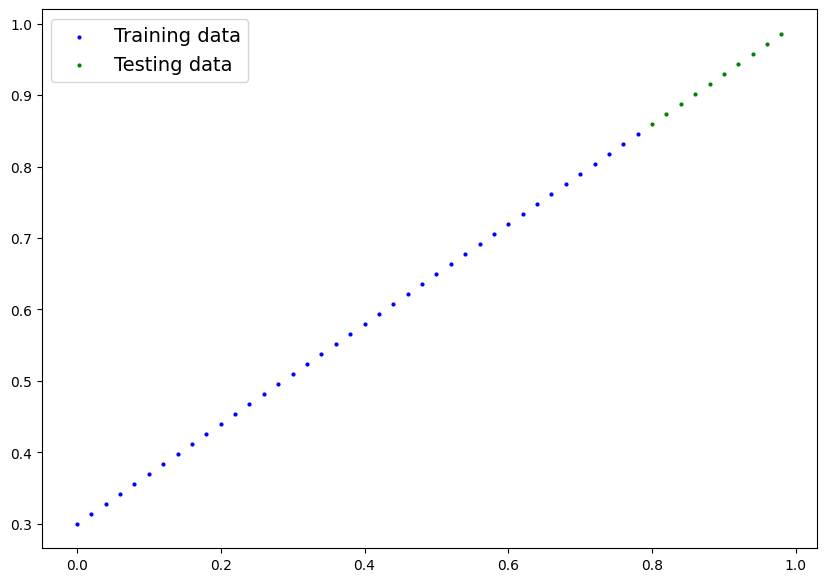

In [8]:
plot_predictions()

### Creating the model using pytorch

In [9]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float32))
    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


### PyTorch model building essentials
* torch.nn - contains all of the building blocks for computational graphs(neural net here)
* torch.nn.Parameter - what parameters should our model try and learn, often PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent
* forward method - all nn.Module subclasses require you to overwrite forward(), this method defines what happens in the
forward computation

In [10]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the linear regression model
LiNet_0 = LinearRegressionModel()
list(LiNet_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
LiNet_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using 'torch.inference_mode()' before training the LiNet_0 model

In [12]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [13]:
with torch.inference_mode():
    y_preds = LiNet_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

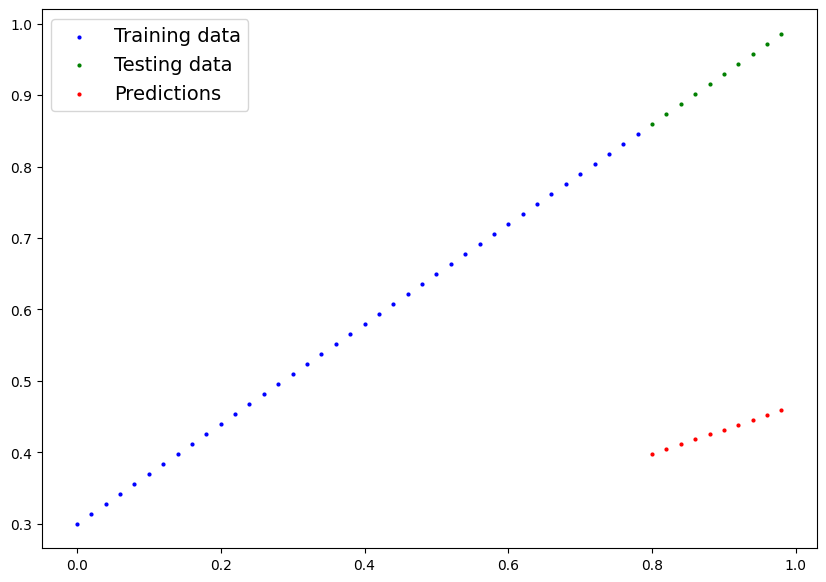

In [14]:
plot_predictions(predictions=y_preds)

In [15]:
with torch.no_grad():
    y_preds = LiNet_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

### Training a model(Converting the model from a relatively poor representation to a better representation)

Things we need to train:

* Loss function
* Optimizer


In [16]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer(Stochastic gradient descent)
optimizer = torch.optim.SGD(params=LiNet_0.parameters(),
                            lr=0.01)

### Creating a training loop

0. Loop through the data
1. Forward propagation to make predictions on the data
2. Calculate the loss
3. Optimizer zero grad
4. Backpropagation - calculating the gradients of the parameters wrt loss
5. Optimizer step - use the optimizer to adjust the parameters to improve the loss

In [17]:
torch.manual_seed(42)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    LiNet_0.train()
    # 1. Forward pass
    y_pred = LiNet_0(X_train)
    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    #print(f"Loss: {loss}")
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    # 4. Perform backpropagation 
    loss.backward() 
    # 5. Perform gradient descent
    optimizer.step() # by default the optimizer changes will accumulate through the loop so we have to zero them in step 3.
    
    ### Testing
    LiNet_0.eval() # turns off different settings in the model not needed for evaluation/testing
    with torch.inference_mode(): # turns off gradient tracking and couple more things behind the scenes
    #with torch.no_grad(): # One can also use this but the above line of code is better
        # 1. Forward pass
        test_pred = LiNet_0(X_test)
        # 2. Calculate the test loss
        test_loss = loss_fn(test_pred, y_test)
    if (epoch + 1) % 10 == 0:
        epoch_count.append(epoch + 1)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch + 1} | MAE Train Loss: {loss} | MAE Test loss: {test_loss}")
        print(LiNet_0.state_dict())



Epoch: 10 | MAE Train Loss: 0.20919232070446014 | MAE Test loss: 0.3598262071609497
OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])
Epoch: 20 | MAE Train Loss: 0.09681284427642822 | MAE Test loss: 0.22817862033843994
OrderedDict([('weights', tensor([0.4146])), ('bias', tensor([0.3258]))])
Epoch: 30 | MAE Train Loss: 0.0545857772231102 | MAE Test loss: 0.14967669546604156
OrderedDict([('weights', tensor([0.4483])), ('bias', tensor([0.3743]))])
Epoch: 40 | MAE Train Loss: 0.04591871052980423 | MAE Test loss: 0.11538954079151154
OrderedDict([('weights', tensor([0.4728])), ('bias', tensor([0.3868]))])
Epoch: 50 | MAE Train Loss: 0.04202762991189957 | MAE Test loss: 0.10030148178339005
OrderedDict([('weights', tensor([0.4920])), ('bias', tensor([0.3848]))])
Epoch: 60 | MAE Train Loss: 0.0385376438498497 | MAE Test loss: 0.08928143978118896
OrderedDict([('weights', tensor([0.5100])), ('bias', tensor([0.3798]))])
Epoch: 70 | MAE Train Loss: 0.035098835825920105 | MAE 

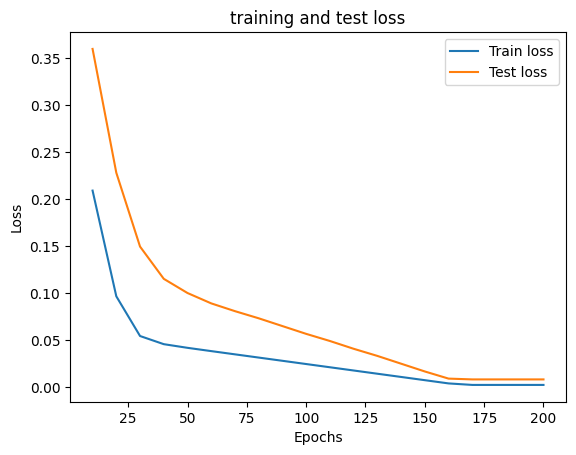

In [18]:
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("training and test loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [19]:
with torch.inference_mode():
    y_preds_new = LiNet_0(X_test)

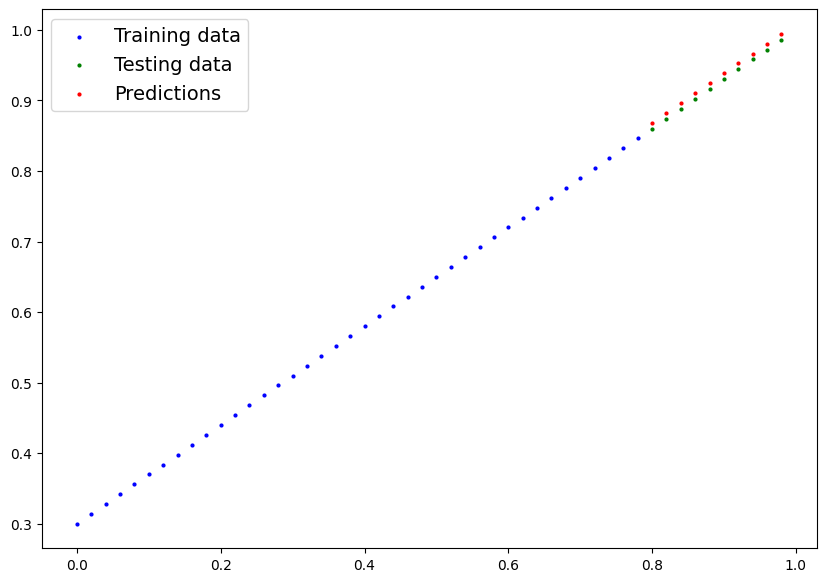

In [20]:
plot_predictions(predictions=y_preds_new)

### Saving a model in PyTorch
1. torch.save() - allows you to save a PyTorch object in python's pickle format
2. torch.load() - allows you load a saved PyTorch object
3. torch.nn.Module.load_state_dict() - allows you to load a model's saved state dictionary

In [21]:
# Saving the PyTorch model
from pathlib import Path

# Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "LiNet_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=LiNet_0.state_dict(), f= MODEL_SAVE_PATH)

Saving model to: models\LiNet_0.pth


### Loading a PyTorch model

In [22]:
# To load in a saved state_dict, we have to instantiate a new instance of our model class
loaded_LiNet_0 = LinearRegressionModel()

# Load the saved state_dict of LiNet_0 (this will update the new instance with updated parameters)
loaded_LiNet_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [23]:
loaded_LiNet_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [24]:
# Make some predictions with our loaded model
loaded_LiNet_0.eval()
with torch.inference_mode():
    loaded_LiNet_0_preds = loaded_LiNet_0(X_test)
loaded_LiNet_0_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [25]:
# Compare loaded model predictions with the original model predictions
y_preds_new == loaded_LiNet_0_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### Create device agnostic code

In [26]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [27]:
# Create data using the linear regression formula
weight = 0.7
bias = 0.3
step = 0.02

start = 0
end = 1

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [28]:
# Split data into training and testing 
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

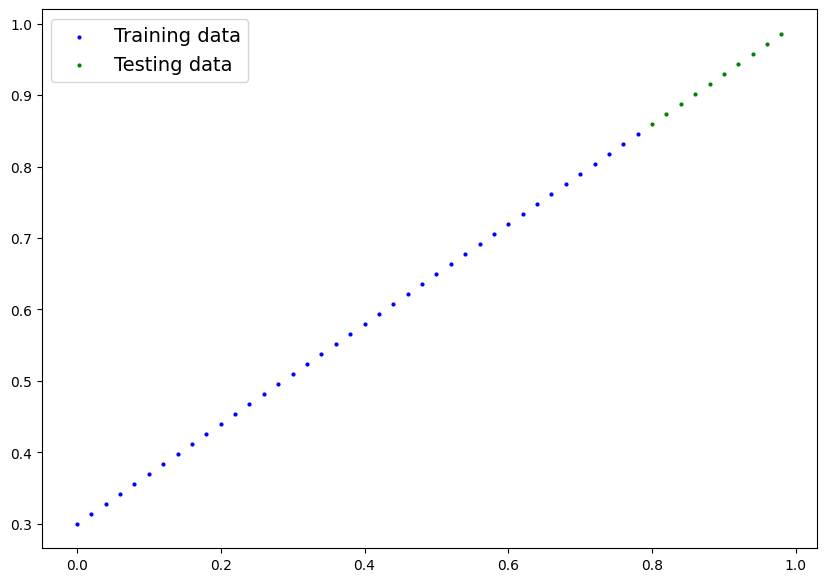

In [29]:
plot_predictions(X_train, y_train, X_test, y_test)

### Building a PyTorch Linear model

In [30]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear(), applying a linear transformation
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
# Set the manual seed
torch.manual_seed(42)
LiNet_1 = LinearRegressionModelV2()
LiNet_1, LiNet_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [31]:
next(LiNet_1.parameters()).device

device(type='cpu')

In [32]:
# Set the model to use gpu
LiNet_1.to(device)
next(LiNet_1.parameters()).device

device(type='cuda', index=0)

### Training the linear regression model using gpu

In [33]:
# Setup loss function
loss_fn = nn.L1Loss() # Mean absolute error

# Setup the optimizer
optimizer = torch.optim.SGD(params=LiNet_1.parameters(), lr=0.01)

In [34]:
# Training the model
torch.manual_seed(42)

epochs = 200

# Put data on the gpu
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  LiNet_1.train()

  # 1. Forward propagation
  y_pred = LiNet_1(X_train)

  # 2. Calculate the training loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # Testing
  LiNet_1.eval()
  with torch.inference_mode():
    test_pred = LiNet_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if (epoch + 1) % 10 == 0: 
    print(f"Epoch: {epoch + 1} | Loss: {loss} | Test loss: {test_loss}")
     


Epoch: 10 | Loss: 0.45148906111717224 | Test loss: 0.45273739099502563
Epoch: 20 | Loss: 0.3362792134284973 | Test loss: 0.3180275559425354
Epoch: 30 | Loss: 0.2210693210363388 | Test loss: 0.18331770598888397
Epoch: 40 | Loss: 0.1058594360947609 | Test loss: 0.048607874661684036
Epoch: 50 | Loss: 0.02469830960035324 | Test loss: 0.046863656491041183
Epoch: 60 | Loss: 0.02029886282980442 | Test loss: 0.04690512642264366
Epoch: 70 | Loss: 0.016866983845829964 | Test loss: 0.0386325903236866
Epoch: 80 | Loss: 0.013428181409835815 | Test loss: 0.030360031872987747
Epoch: 90 | Loss: 0.009996932931244373 | Test loss: 0.02277437411248684
Epoch: 100 | Loss: 0.006563369184732437 | Test loss: 0.014501834288239479
Epoch: 110 | Loss: 0.0031245655845850706 | Test loss: 0.006229287479072809
Epoch: 120 | Loss: 0.010256479494273663 | Test loss: 0.00033081771107390523
Epoch: 130 | Loss: 0.010256479494273663 | Test loss: 0.00033081771107390523
Epoch: 140 | Loss: 0.010256479494273663 | Test loss: 0.0003

In [36]:
LiNet_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

### Making and evaluating predictions

In [37]:
# Put the model into evaluation mode
LiNet_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = LiNet_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

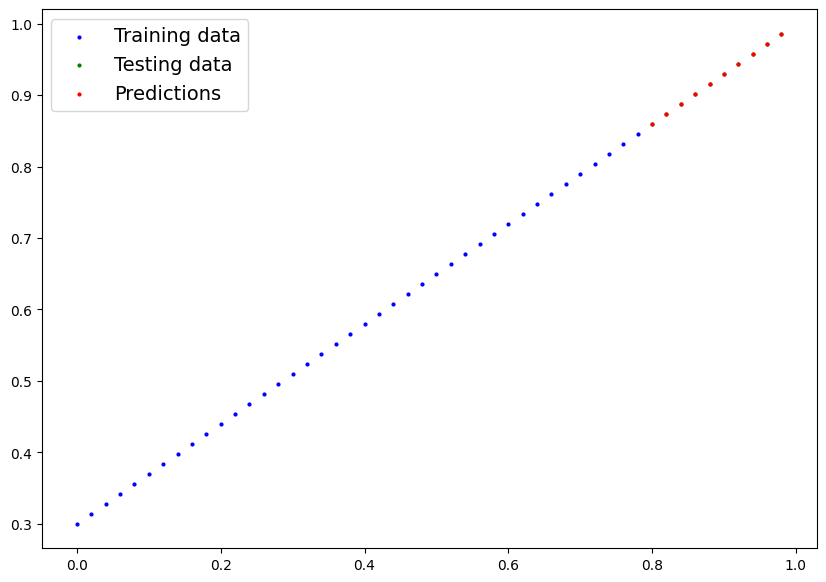

In [38]:
plot_predictions(predictions=y_preds.cpu())
# Predicted values are almost the same as the test data labels

### Saving and loading a trained model

In [43]:
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "LiNet_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=LiNet_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models\LiNet_1.pth


In [44]:
loaded_LiNet_1 = LinearRegressionModelV2()

loaded_LiNet_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_LiNet_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [45]:
loaded_LiNet_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [46]:
# Evaluate loaded model
loaded_LiNet_1.eval()

with torch.inference_mode():
    loaded_LiNet_1_preds = loaded_LiNet_1(X_test)
y_preds == loaded_LiNet_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')